# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Visualise residual forecast

<br></font>
</div>

# Import modules

In [1]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
import numpy
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
from statsmodels.graphics.gofplots import qqplot

rcParams['figure.figsize'] = 15, 6
rcParams['font.size'] = 20

# Import the dataset

In [2]:
series = read_csv('../DATASETS/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# Persistence Forecast Model

In [3]:
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
predictions = [x for x in test_X]

# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))] 
residuals = DataFrame(residuals)
print(residuals.head())

      0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0


# Residual line plot

<div class="alert alert-block alert-info">
<font color=black><br>

- The first plot is to look at the residual forecast errors over time as a line plot. 
- We would expect the plot to be random around the value of 0 and not show any trend or cyclic structure.
- If we did see trend, seasonal or cyclic structure, we could go back to our model and attempt to capture those elements directly.

<br></font>
</div>

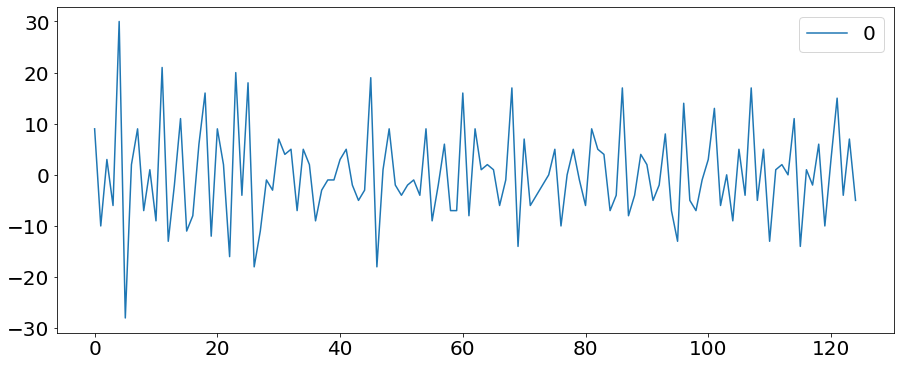

In [4]:
# plot residuals
residuals.plot()
pyplot.show()

# Residual Summary Statistics

<div class="alert alert-block alert-info">
<font color=black><br>

- We can calculate summary statistics on the residual errors. Primarily, we are interested in the mean value of the residual errors. 
- A value close to zero suggests no bias in the forecasts, whereas positive and negative values suggest a positive or negative bias in the forecasts made. 
- It is useful to know about a bias in the forecasts as it can be directly corrected in forecasts prior to their use or evaluation
- The mean error value close to zero, but perhaps not close enough. It suggests that here may be some bias and that we may be able to further improve the model by performing a bias correction. This could be done by adding the mean residual error (0.064000) to forecasts. This may work in this case, but it is a NAIVE form of bias correction and there are MORE sophisticated methods available.

<br></font>
</div>

In [5]:
# summary statistics
print(residuals.describe())

                0
count  125.000000
mean     0.064000
std      9.187776
min    -28.000000
25%     -6.000000
50%     -1.000000
75%      5.000000
max     30.000000


# Residual Histogram and Density Plots

<div class="alert alert-block alert-info">
<font color=black><br>

- Plots can be used to better understand the distribution of errors beyond summary statistics. 
- We would expect the forecast errors to be normally distributed around a zero mean.
- We can see that the distribution does have a Gaussian look, but is perhaps more pointy, showing an exponential 
distribution with some asymmetry. If the plot showed a distribution that was distinctly non-Gaussian, it would 
suggest that assumptions made by the modeling process were perhaps incorrect and that a different modeling 
method may be required. A large skew may suggest the opportunity for performing a transform to the data prior
to modeling, such as taking the log or square root.

<br></font>
</div>

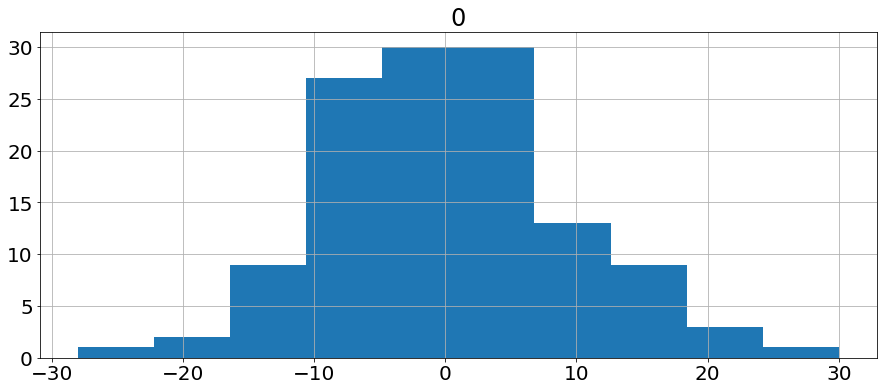

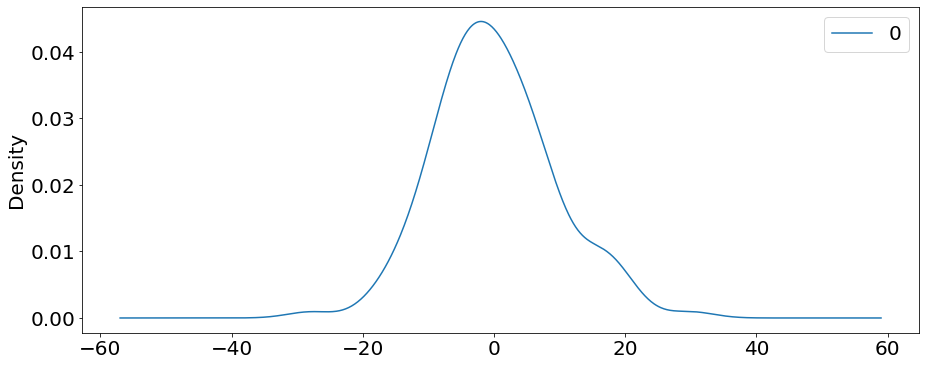

In [6]:
# histogram plot
residuals.hist()
pyplot.show()

# density plot
residuals.plot(kind='kde')
pyplot.show()

# Residual Q-Q Plot

<div class="alert alert-block alert-info">
<font color=black><br>

- A Q-Q plot, or quantile plot, compares two distributions and can be used to see how similar or different they happen to be. 
- The Q-Q plot can be used to quickly check the normality of the distribution of residual errors. 
- The values are ordered and compared to an idealized Gaussian distribution. 
- Running the example shows a Q-Q plot that the distribution is seemingly normal with a few bumps and outliers.

<br></font>
</div>

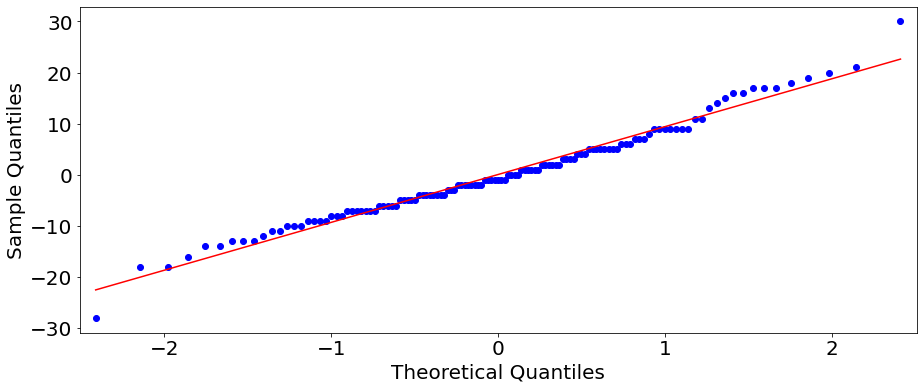

In [11]:
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))] 
residuals = numpy.array(residuals)
qqplot(residuals, line='r')
pyplot.show()

# Residual Autocorrelation Plot

<div class="alert alert-block alert-info">
<font color=black><br>

- Autocorrelation calculates the strength of the relationship between an observation and observations at prior time steps.
- We would not expect there to be any correlation between the residuals. 
- This would be shown by autocorrelation scores being below the threshold of significance (dashed and dotted horizontal lines on the plot)
- We do not see an obvious autocorrelation trend across the plot. There may be some positive autocorrelation worthy of further investigation at lag 7 that seems significant.

<br></font>
</div>

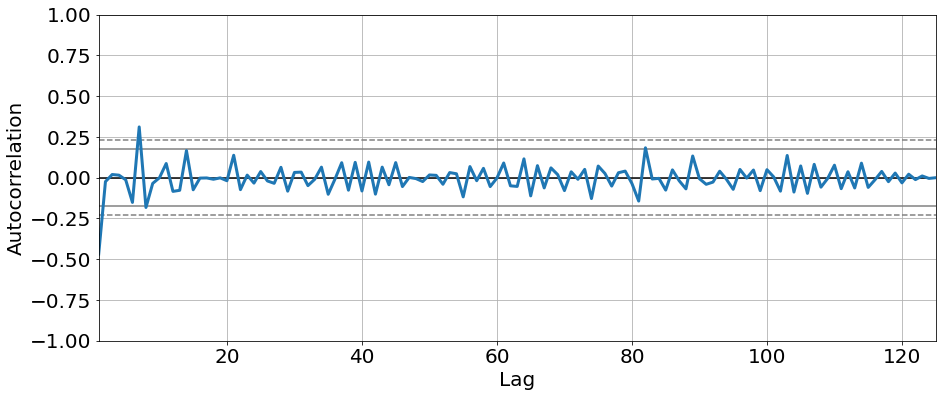

In [9]:
autocorrelation_plot(residuals, lw = 3)
pyplot.show()

# References

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/?s=time+series&post_type=post&submit=Search

</font>
</div>